In [38]:
#importo librerías necesarias
import pandas as pd
import seaborn as sns
import missingno as msn

In [54]:
#primer scv a analizar
df_withscore=pd.read_csv('datasets/plataformas_withscore.csv')

<Axes: xlabel='platform', ylabel='score'>

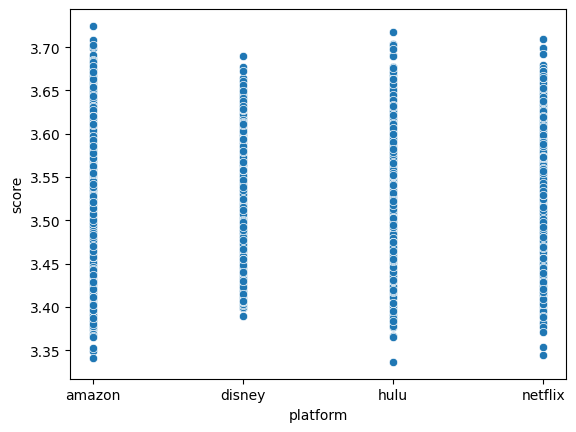

In [55]:
#busco correlaciones entre datos
sns.scatterplot(x='platform', y='score', data=df_withscore)

In [56]:

df_withscore['rating'].value_counts()


tv-ma      3675
tv-14      3138
r          2154
13+        2117
tv-pg      1654
           ... 
119 min       1
115 min       1
136 min       1
61 min        1
129 min       1
Name: rating, Length: 105, dtype: int64

In [57]:
#vi que hay duraciones y redundancias en la columna rating así que los reemplazo
df_withscore["rating"] = df_withscore["rating"].str.replace(".*min", "sin_dato", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace(".*seasons", "sin_dato", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace(".*season", "sin_dato", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("^16.*", "+16", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("^18.*", "+18", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("all_ages", "all", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("sin_dato", "not_rate", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("not rated", "not_rate", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("^ages_16_", "+16", regex=True)
df_withscore["rating"] = df_withscore["rating"].str.replace("^ages_18_", "+18", regex=True)

In [58]:
df_withscore['rating'].value_counts()

tv-ma       3675
tv-14       3138
r           2154
13+         2117
tv-pg       1654
+16         1550
g           1269
all         1269
+18         1246
pg-13       1112
pg           881
tv-g         767
tv-y7        550
tv-y         462
7+           385
nr           304
not_rate     299
tv-nr        105
unrated       33
tv-y7-fv      19
nc-17          6
ur             3
Name: rating, dtype: int64

<Axes: xlabel='score', ylabel='rating'>

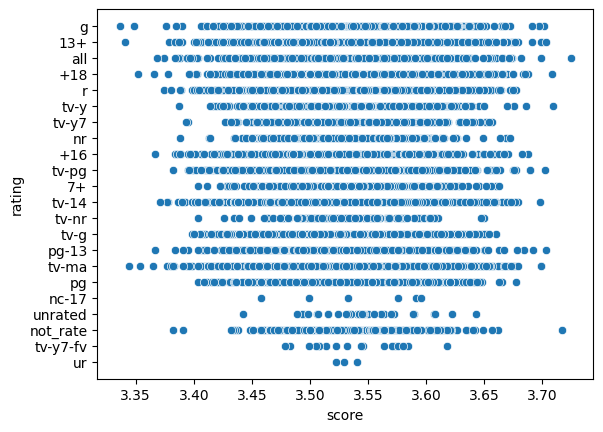

In [8]:
#busco correlacion de score con rating
sns.scatterplot(x='score', y='rating', data=df_withscore)


<Axes: xlabel='score', ylabel='platform'>

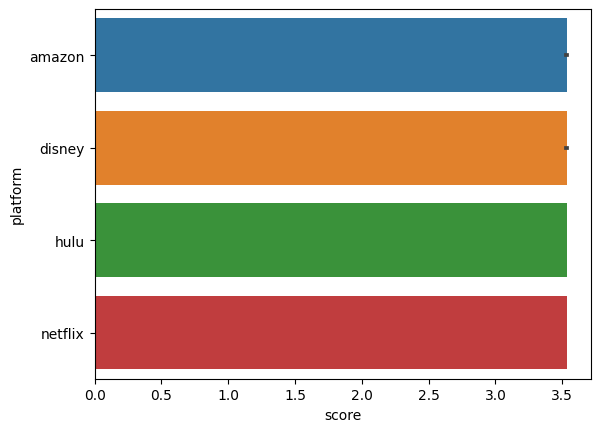

In [9]:
#tampoco hay suerte con plataforma, aunque podemos ver que amazon y disney sacan una lijera ventaja
sns.barplot(x="score", y="platform", data=df_withscore)


<Axes: xlabel='score', ylabel='type'>

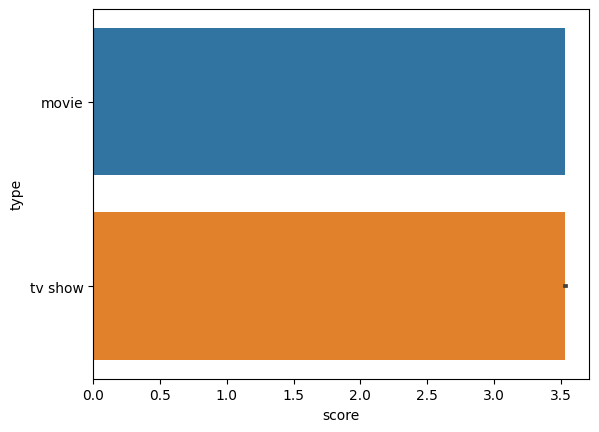

In [10]:
#acá podemos ver que la ventaja la sacan los tv shows
sns.barplot(x="score", y="type", data=df_withscore)


<Axes: >

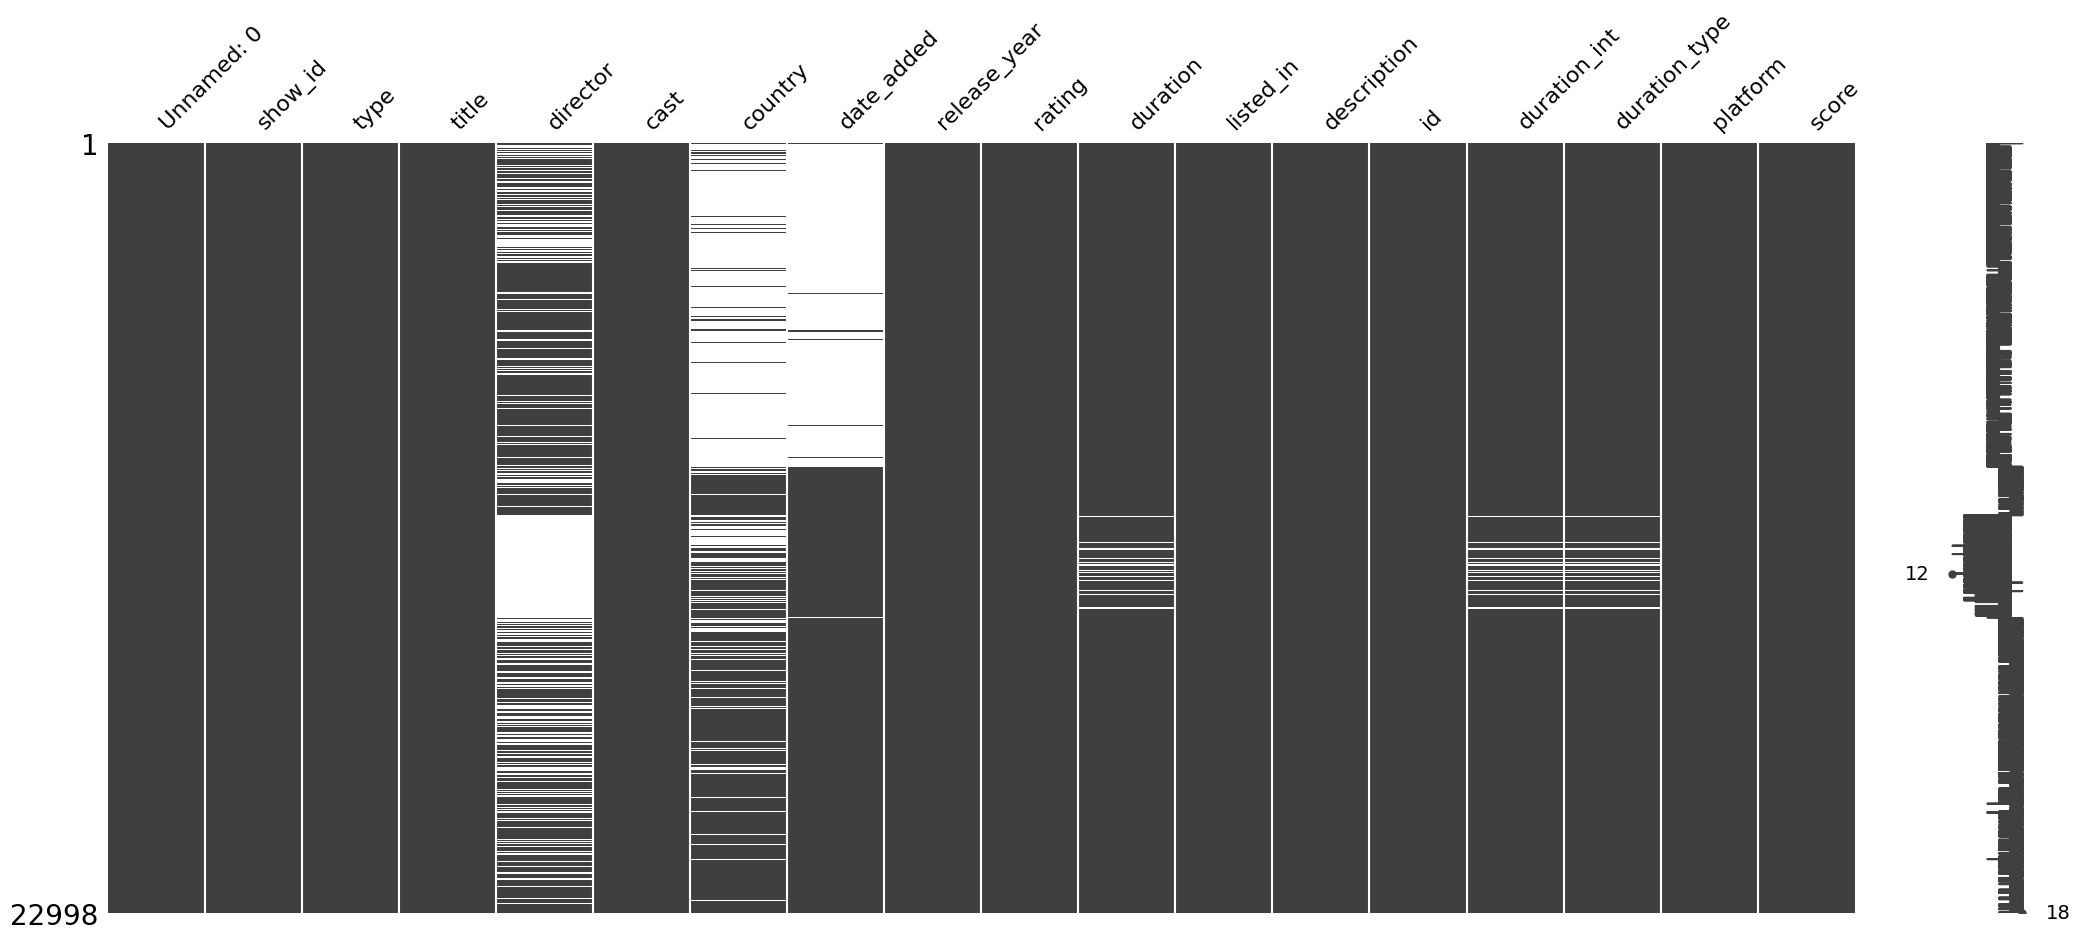

In [24]:
#Busco una correlación entre valores nulos
msn.matrix(df_withscore)

In [25]:
#reemplazo los valores nulos por 'min'
df_withscore['duration_type'].fillna(value='min', inplace=True)

In [26]:
df_withscore['duration_type'].isna().value_counts()

False    22998
Name: duration_type, dtype: int64

In [27]:
#reemplazo los valores nulos por 0
df_withscore['duration_int'].fillna(value=0, inplace=True)
df_withscore['duration_int'].isna().value_counts()


False    22998
Name: duration_int, dtype: int64

<Axes: >

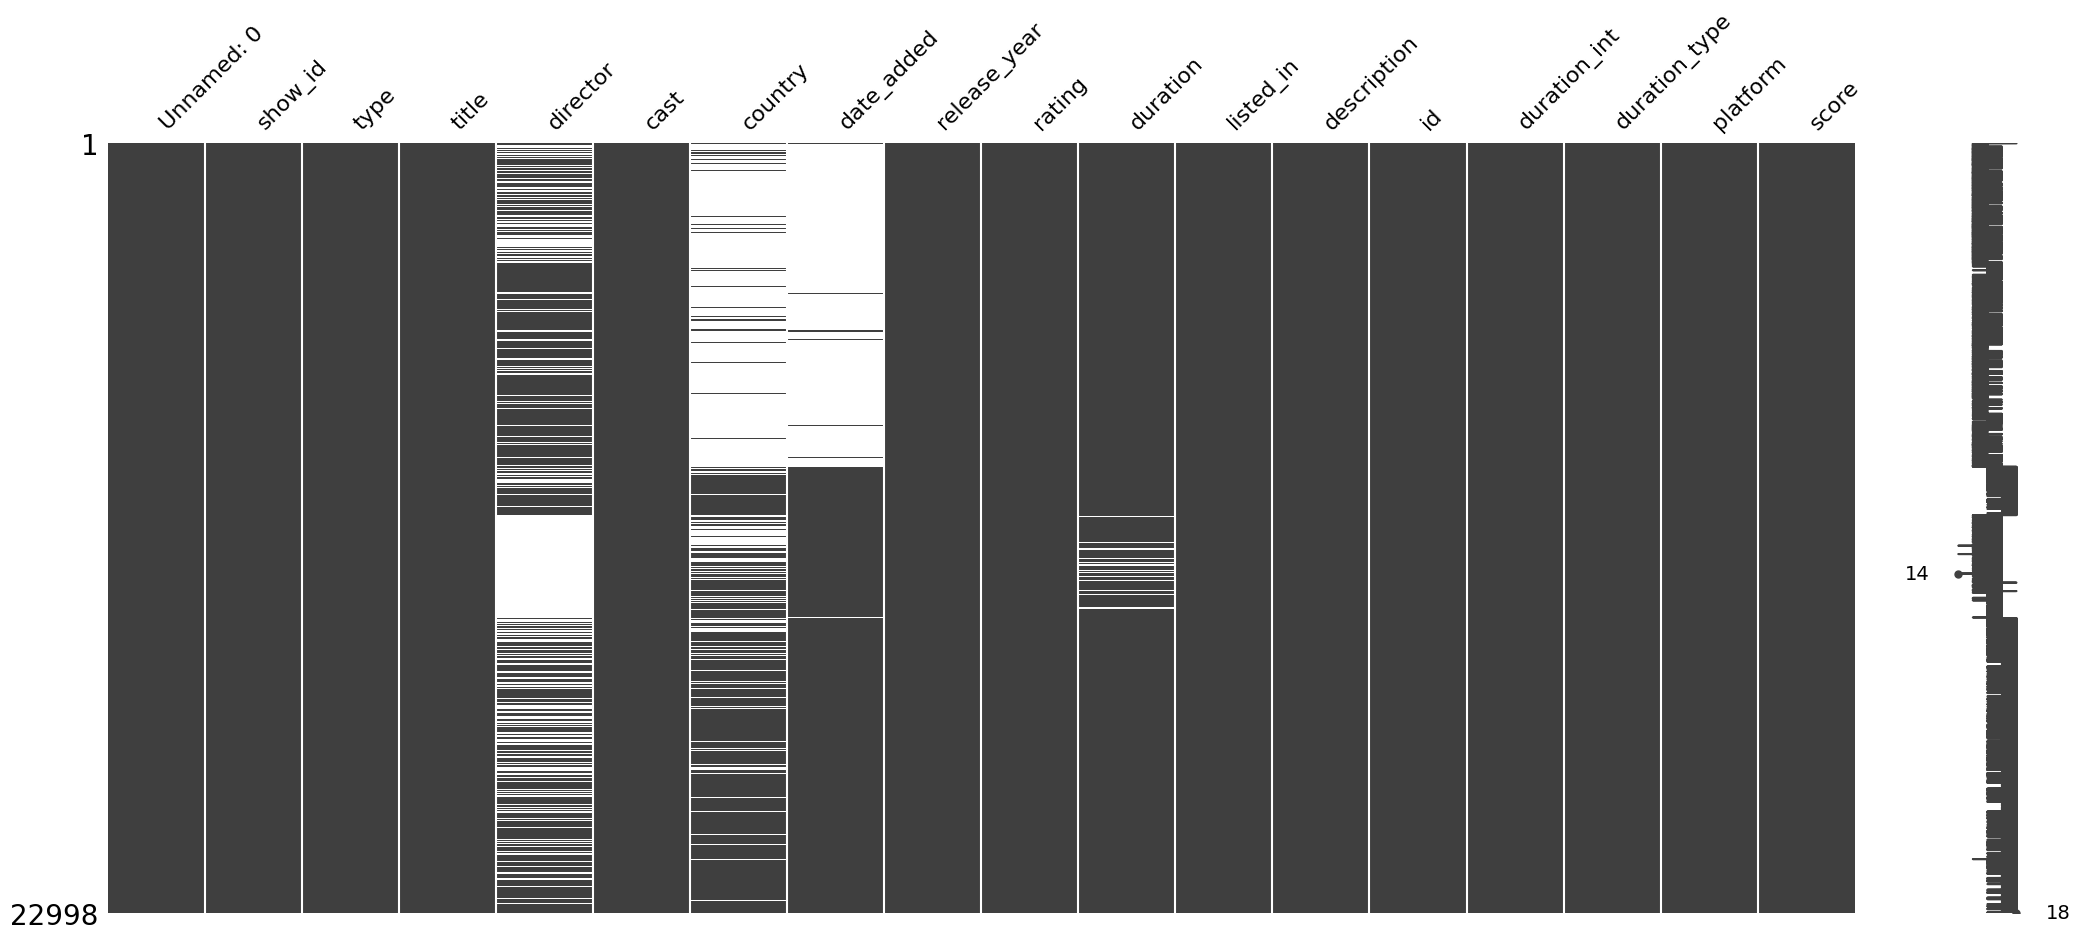

In [28]:
msn.matrix(df_withscore)

<Axes: xlabel='release_year', ylabel='score'>

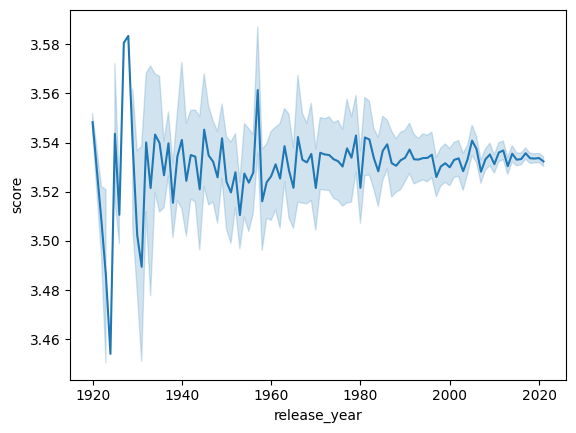

In [29]:
#El score varía mas en peliculas más antiguas
sns.lineplot(x='release_year', y='score', data=df_withscore)

In [16]:
df_rating= pd.read_csv('datasets/Rating.csv')

In [17]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   userId      int64  
 2   score       float64
 3   timestamp   int64  
 4   movieId     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 420.5+ MB


In [18]:
df_rating.isnull().sum()

Unnamed: 0    0
userId        0
score         0
timestamp     0
movieId       0
dtype: int64

<Axes: >

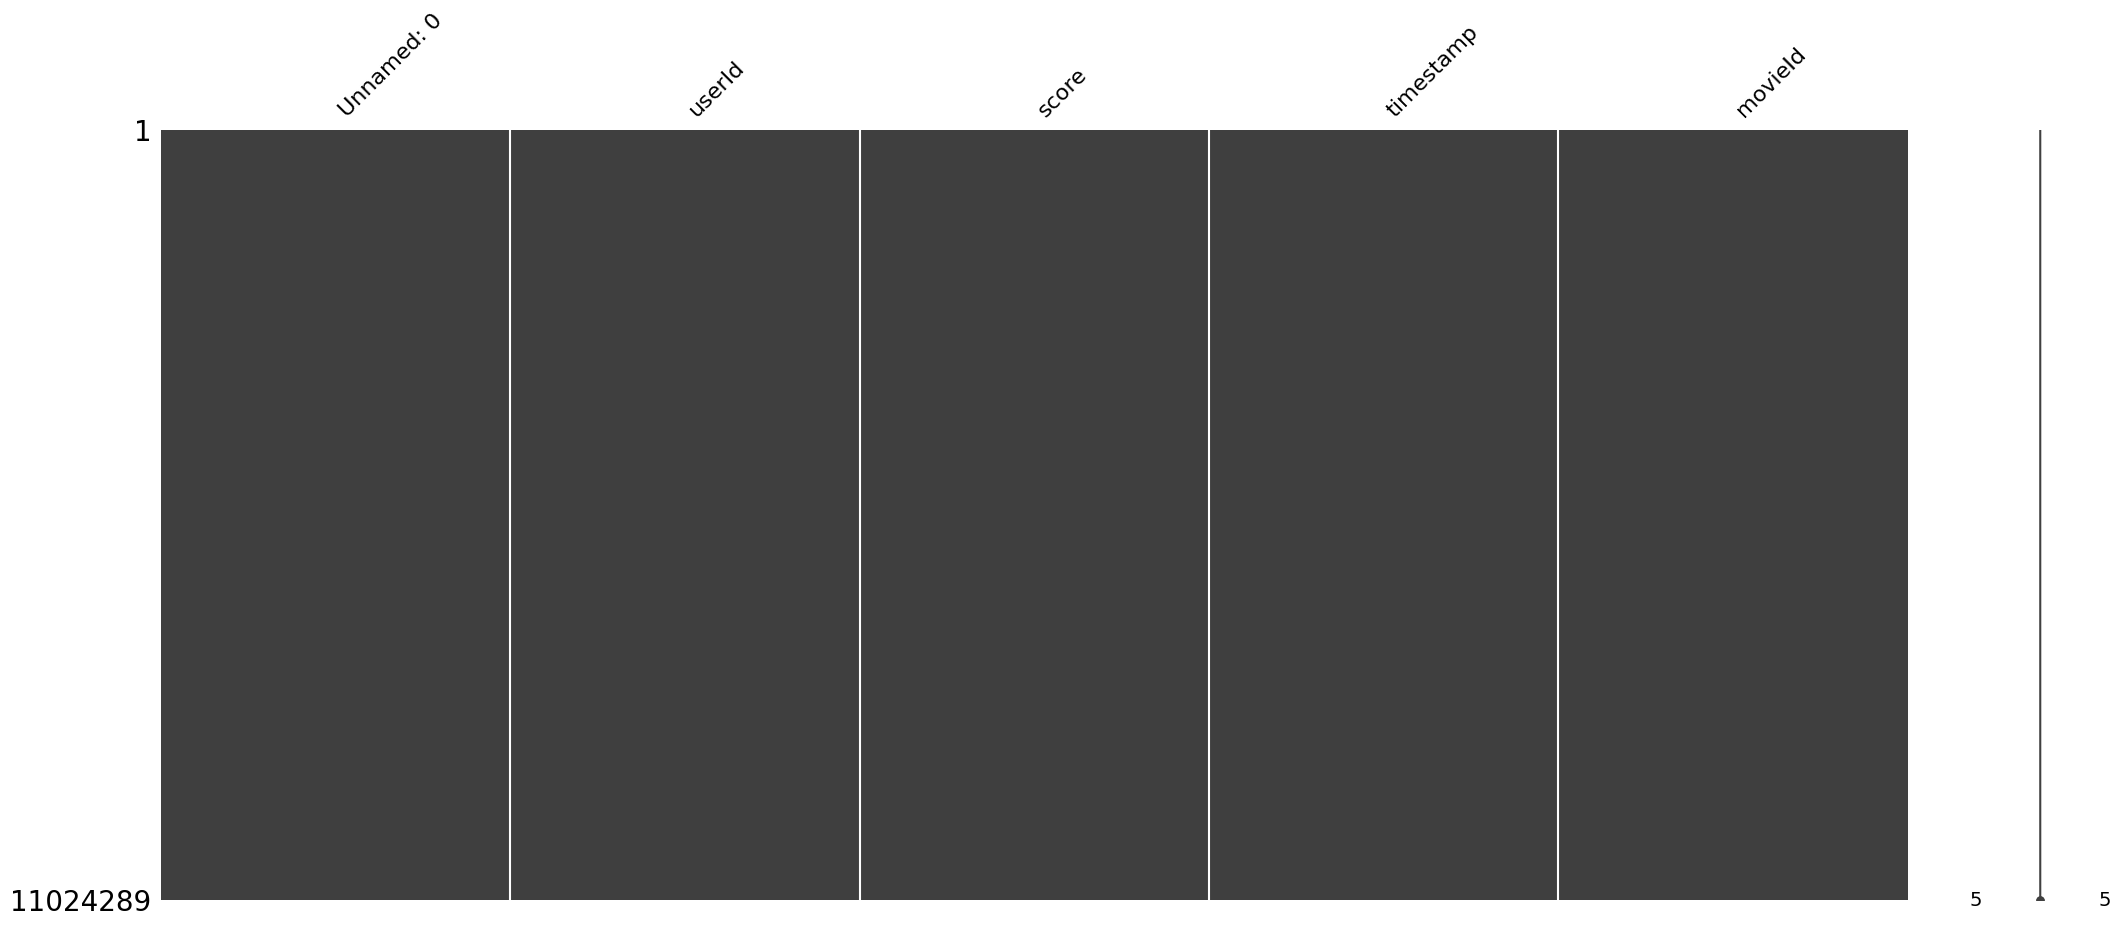

In [19]:
msn.matrix(df_rating)

In [30]:
df_unique=pd.read_csv('datasets/plataformas_unique.csv')

In [31]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     22998 non-null  int64  
 1   show_id        22998 non-null  object 
 2   type           22998 non-null  object 
 3   title          22998 non-null  object 
 4   director       14739 non-null  object 
 5   cast           22998 non-null  object 
 6   country        11499 non-null  object 
 7   date_added     13444 non-null  object 
 8   release_year   22998 non-null  int64  
 9   rating         22998 non-null  object 
 10  duration       22516 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22994 non-null  object 
 13  id             22998 non-null  object 
 14  duration_int   22516 non-null  float64
 15  duration_type  22516 non-null  object 
 16  platform       22998 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 

In [32]:
df_unique.isnull().sum()

Unnamed: 0           0
show_id              0
type                 0
title                0
director          8259
cast                 0
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
duration_int       482
duration_type      482
platform             0
dtype: int64

In [35]:
df_unique['rating'].value_counts()

tv-ma      3675
tv-14      3138
r          2154
13+        2117
tv-pg      1654
           ... 
119 min       1
115 min       1
136 min       1
61 min        1
129 min       1
Name: rating, Length: 105, dtype: int64

In [40]:
df_unique["rating"] = df_unique["rating"].str.replace(".*min", "sin_dato", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace(".*seasons", "sin_dato", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace(".*season", "sin_dato", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("^16.*", "+16", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("^18.*", "+18", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("all_ages", "all", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("sin_dato", "not_rate", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("not rated", "not_rate", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("^ages_16_", "+16", regex=True)
df_unique["rating"] = df_unique["rating"].str.replace("^ages_18_", "+18", regex=True)
df_unique['rating'].value_counts()

tv-ma       3675
tv-14       3138
r           2154
13+         2117
tv-pg       1654
+16         1550
g           1269
all         1269
+18         1246
pg-13       1112
pg           881
tv-g         767
tv-y7        550
tv-y         462
7+           385
nr           304
not_rate     299
tv-nr        105
unrated       33
tv-y7-fv      19
nc-17          6
ur             3
Name: rating, dtype: int64

In [41]:
df_unique.isnull().sum()

Unnamed: 0           0
show_id              0
type                 0
title                0
director          8259
cast                 0
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
duration_int       482
duration_type      482
platform             0
dtype: int64

In [42]:
df_unique['director'].fillna('unknown', inplace=True)

In [43]:
df_unique.isnull().sum()

Unnamed: 0           0
show_id              0
type                 0
title                0
director             0
cast                 0
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
duration_int       482
duration_type      482
platform             0
dtype: int64

In [59]:
df_machine1=df_unique[['id','duration_int','duration_type','platform','rating','type','release_year']]
df_machine1.head()

,id,duration_int,duration_type,platform,rating,type,release_year
0,as1,113.0,min,amazon,g,movie,2014
1,as2,110.0,min,amazon,13+,movie,2018
2,as3,74.0,min,amazon,g,movie,2017
3,as4,69.0,min,amazon,g,movie,2014
4,as5,45.0,min,amazon,g,movie,1989


In [60]:
df_machine2=df_rating[['movieId', 'userId','score']]
df_machine2.head()

,movieId,userId,score
0,as680,1,1.0
1,ns2186,1,4.5
2,hs2381,1,5.0
3,ns3663,1,5.0
4,as9500,1,5.0


In [61]:
Machine_learning = df_machine1.merge(df_machine2, left_on="id", right_on="movieId")

In [62]:
Machine_learning.head()

,id,duration_int,duration_type,platform,rating,type,release_year,movieId,userId,score
0,as1,113.0,min,amazon,g,movie,2014,as1,543,5.0
1,as1,113.0,min,amazon,g,movie,2014,as1,595,3.0
2,as1,113.0,min,amazon,g,movie,2014,as1,611,3.0
3,as1,113.0,min,amazon,g,movie,2014,as1,2523,3.5
4,as1,113.0,min,amazon,g,movie,2014,as1,3082,4.0


In [63]:
Machine_learning.to_csv('ML.csv')